## Truc a faire:

- Model de la derniere seance de fouille de données a tester
- Model de clustering a tester
- a voir pour tester des auto encodeur



In [1]:
import numpy as np
import pandas as pd
import os
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive

# Montez Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.listdir('drive/MyDrive/fouille de données/data')

['guillaume.txt']

In [4]:
PATH = 'drive/MyDrive/fouille de données/data/guillaume.txt'

In [5]:
df=pd.read_csv(PATH,sep=";",decimal=",")

<ipython-input-5-bc28fbe99bbd>:1: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(PATH,sep=";",decimal=",")


In [6]:
df.drop(columns=["CodeDecision","ZIBZIN"],inplace=True)

In [7]:
df

,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
0,78643044,0,20.0,2017-02-01 07:32:14,0,0,0,551,0.0,0.0,0.0,37.186668,52.076034,0,1,4.0,4.0,4.0,20.0,0.0,27134
1,78643045,0,20.0,2017-02-01 07:43:37,0,0,0,551,0.0,0.0,0.0,48.844716,52.076034,1,2,1.797685,4.0,4.0,28.61,8.61,27817
2,78643046,0,57.64,2017-02-01 07:47:38,0,0,0,549,0.0,0.0,0.0,73.11828,52.076034,0,1,4.0,4.0,4.0,57.64,0.0,28058
3,78643047,0,54.29,2017-02-01 07:48:48,1,1,1,267,0.0,0.0,0.0,110.056926,53.554234,0,1,4.0,4.0,4.0,54.29,0.0,28128
4,78643048,0,26.9,2017-02-01 08:13:27,0,0,0,549,0.003769,8.586333,0.001192,45.368313,52.076034,1,1,1.997106,4.0,4.0,59.15,32.25,29607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4646769,84966399,0,23.94,2017-11-30 21:20:15,0,0,0,1,4.788,-22.542614,1.970346,42.072631,43.030421,0,1,5.0,5.0,5.0,23.94,0.0,76815
4646770,84966400,0,92.6,2017-11-30 21:22:49,0,0,0,514,0.060052,-2.236379,0.003084,167.130919,36.813027,1,2,1.035949,4.0,4.0,262.45,169.85,76969
4646771,84966401,0,69.0,2017-11-30 21:24:37,0,0,0,1,3.631579,-1.062954,0.790971,72.607261,52.076034,0,1,5.0,5.0,5.0,69.0,0.0,77077
4646772,84966402,0,57.8,2017-11-30 21:57:32,0,0,0,1,28.9,0.567666,0.581925,31.880978,82.051282,0,1,5.0,5.0,5.0,57.8,0.0,79052


In [8]:
df.drop(1956360,inplace=True)

In [9]:
df['DateTransaction'] = pd.to_datetime(df['DateTransaction'], yearfirst=True)

# Création de trois nouvelles colonnes : Année, Mois, Jour
df['Année'] = df['DateTransaction'].dt.year
df['Mois'] = df['DateTransaction'].dt.month
df['Jour'] = df['DateTransaction'].dt.day

# Création de trois nouvelles colonnes : Heure, Minute, Seconde
df['Heure'] = df['DateTransaction'].dt.hour
df['Minute'] = df['DateTransaction'].dt.minute
df['Seconde'] = df['DateTransaction'].dt.second

In [10]:
df.iloc[1956360]


IDAvisAutorisationCheque               78643047
FlagImpaye                                    0
Montant                      54,289999999999999
DateTransaction             2017-02-01 07:48:48
VerifianceCPT1                                1
VerifianceCPT2                                1
VerifianceCPT3                                1
D2CB                                        267
ScoringFP1                                    0
ScoringFP2                                    0
ScoringFP3                                    0
TauxImpNb_RB                 110,05692599620494
TauxImpNB_CPM                53,554233554497365
EcartNumCheq                                  0
NbrMagasin3J                                  1
DiffDateTr1                                   4
DiffDateTr2                                   4
DiffDateTr3                                   4
CA3TRetMtt                   54,289999999999999
CA3TR                                         0
Heure                                   

In [11]:
y=df.FlagImpaye

In [12]:
y=y.astype(int)

In [13]:
df.drop(columns=["FlagImpaye","DateTransaction"],inplace=True)

In [14]:
df

,IDAvisAutorisationCheque,Montant,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Année,Mois,Jour,Minute,Seconde
0,78643044,20.0,0,0,0,551,0.0,0.0,0.0,37.186668,52.076034,0,1,4.0,4.0,4.0,20.0,0.0,7,2017,2,1,32,14
1,78643045,20.0,0,0,0,551,0.0,0.0,0.0,48.844716,52.076034,1,2,1.797685,4.0,4.0,28.61,8.61,7,2017,2,1,43,37
2,78643046,57.64,0,0,0,549,0.0,0.0,0.0,73.11828,52.076034,0,1,4.0,4.0,4.0,57.64,0.0,7,2017,2,1,47,38
3,78643047,54.29,1,1,1,267,0.0,0.0,0.0,110.056926,53.554234,0,1,4.0,4.0,4.0,54.29,0.0,7,2017,2,1,48,48
4,78643048,26.9,0,0,0,549,0.003769,8.586333,0.001192,45.368313,52.076034,1,1,1.997106,4.0,4.0,59.15,32.25,8,2017,2,1,13,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4646769,84966399,23.94,0,0,0,1,4.788,-22.542614,1.970346,42.072631,43.030421,0,1,5.0,5.0,5.0,23.94,0.0,21,2017,11,30,20,15
4646770,84966400,92.6,0,0,0,514,0.060052,-2.236379,0.003084,167.130919,36.813027,1,2,1.035949,4.0,4.0,262.45,169.85,21,2017,11,30,22,49
4646771,84966401,69.0,0,0,0,1,3.631579,-1.062954,0.790971,72.607261,52.076034,0,1,5.0,5.0,5.0,69.0,0.0,21,2017,11,30,24,37
4646772,84966402,57.8,0,0,0,1,28.9,0.567666,0.581925,31.880978,82.051282,0,1,5.0,5.0,5.0,57.8,0.0,21,2017,11,30,57,32


In [15]:
df["ScoringFP1"]=df["ScoringFP1"].replace(',', '.', regex=True)
df["ScoringFP2"]=df["ScoringFP2"].replace(',', '.', regex=True)
df["ScoringFP3"]=df["ScoringFP3"].replace(',', '.', regex=True)
df["Montant"]=df["Montant"].replace(',', '.', regex=True)
df["TauxImpNb_RB"]=df["TauxImpNb_RB"].replace(',', '.', regex=True)
df["TauxImpNB_CPM"]=df["TauxImpNB_CPM"].replace(',', '.', regex=True)
df["DiffDateTr1"]=df["DiffDateTr1"].replace(',', '.', regex=True)
df["DiffDateTr2"]=df["DiffDateTr2"].replace(',', '.', regex=True)
df["DiffDateTr3"]=df["DiffDateTr3"].replace(',', '.', regex=True)
df["CA3TRetMtt"]=df["CA3TRetMtt"].replace(',', '.', regex=True)
df["CA3TR"]=df["CA3TR"].replace(',', '.', regex=True)

## Preprocecing

In [16]:
df.dtypes

IDAvisAutorisationCheque    object
Montant                     object
VerifianceCPT1              object
VerifianceCPT2              object
VerifianceCPT3              object
D2CB                        object
ScoringFP1                  object
ScoringFP2                  object
ScoringFP3                  object
TauxImpNb_RB                object
TauxImpNB_CPM               object
EcartNumCheq                object
NbrMagasin3J                object
DiffDateTr1                 object
DiffDateTr2                 object
DiffDateTr3                 object
CA3TRetMtt                  object
CA3TR                       object
Heure                        int64
Année                        int64
Mois                         int64
Jour                         int64
Minute                       int64
Seconde                      int64
dtype: object

In [17]:
print(y.value_counts())
neg, pos = y.value_counts()
pourcentage = pos / neg *100
pourcentage

0    4616778
1      29995
Name: FlagImpaye, dtype: int64


0.6496955235880955

(array([4616778.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,   29995.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

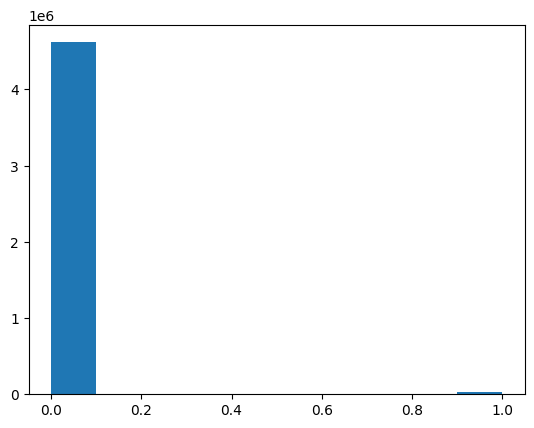

In [18]:
import matplotlib.pyplot as plt
plt.hist(y)

### Sampling

In [19]:
#from imblearn.under_sampling import CondensedNearestNeighbour
#cnn = CondensedNearestNeighbour(sampling_strategy="majority")
#X_res, y_res = cnn.fit_resample(df, y)
#X_res

In [20]:
df

,IDAvisAutorisationCheque,Montant,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Année,Mois,Jour,Minute,Seconde
0,78643044,20.0,0,0,0,551,0.0,0.0,0.0,37.186668,52.076034,0,1,4.0,4.0,4.0,20.0,0.0,7,2017,2,1,32,14
1,78643045,20.0,0,0,0,551,0.0,0.0,0.0,48.844716,52.076034,1,2,1.797685,4.0,4.0,28.61,8.61,7,2017,2,1,43,37
2,78643046,57.64,0,0,0,549,0.0,0.0,0.0,73.11828,52.076034,0,1,4.0,4.0,4.0,57.64,0.0,7,2017,2,1,47,38
3,78643047,54.29,1,1,1,267,0.0,0.0,0.0,110.056926,53.554234,0,1,4.0,4.0,4.0,54.29,0.0,7,2017,2,1,48,48
4,78643048,26.9,0,0,0,549,0.003769,8.586333,0.001192,45.368313,52.076034,1,1,1.997106,4.0,4.0,59.15,32.25,8,2017,2,1,13,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4646769,84966399,23.94,0,0,0,1,4.788,-22.542614,1.970346,42.072631,43.030421,0,1,5.0,5.0,5.0,23.94,0.0,21,2017,11,30,20,15
4646770,84966400,92.6,0,0,0,514,0.060052,-2.236379,0.003084,167.130919,36.813027,1,2,1.035949,4.0,4.0,262.45,169.85,21,2017,11,30,22,49
4646771,84966401,69.0,0,0,0,1,3.631579,-1.062954,0.790971,72.607261,52.076034,0,1,5.0,5.0,5.0,69.0,0.0,21,2017,11,30,24,37
4646772,84966402,57.8,0,0,0,1,28.9,0.567666,0.581925,31.880978,82.051282,0,1,5.0,5.0,5.0,57.8,0.0,21,2017,11,30,57,32


In [ ]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=1, sampling_strategy= 0.01)
X_res, y_res = sme.fit_resample(df, y)
X_res

In [ ]:
#from imblearn.under_sampling import TomekLinks
#tl = TomekLinks(sampling_strategy="majority")
#X_res, y_res = tl.fit_resample(df, y)
#X_res

In [ ]:
#from imblearn.over_sampling import BorderlineSMOTE
#bsm= BorderlineSMOTE(random_state=42, sampling_strategy= 0.01)
#X_res, y_res = bsm.fit_resample(X_res, y_res)
#X_res

In [ ]:
neg, pos = y_res.value_counts()
pourcentage = pos / neg *100
pourcentage

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [4, 8, 10]
}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

best_rf_classifier = grid_search.best_estimator_

predictions = best_rf_classifier.predict(X_test)

print(best_params)

accuracy = accuracy_score(y_test, predictions)

print(accuracy)

## Arbre de decision

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(decision_tree_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_decision_tree_classifier = grid_search.best_estimator_

predictions = best_decision_tree_classifier.predict(X_test)

accuracy_score(predictions,y_test)

## Deep learning

In [ ]:
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers import Dropout, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.initializers import Constant

from tensorflow import keras

import tensorflow as tf

In [ ]:
neg, pos = np.bincount(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Centrer et réduire les colonnes du DataFrame
X_train = pd.DataFrame(scaler.fit_transform(X_train))

In [ ]:
output_bias=np.log([pos/neg])

In [ ]:
output_bias

In [ ]:
# A modif ça marche pas
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
      keras.metrics.F1Score(name="f1_score") #Erreur ici
]

In [ ]:
output_bias = tf.keras.initializers.Constant(output_bias)

In [ ]:
output_bias

In [ ]:
inputs=Input((X_train.shape[1]))


d1 = Dense(16, activation='relu')(inputs)
d1 = Dropout(0.3)(d1)

outputs=Dense(1, activation='sigmoid', bias_initializer=output_bias)(d1)

model = Model(inputs=[inputs], outputs=[outputs])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

In [ ]:
filepath = "model.h5"

earlystopper = EarlyStopping(patience=5, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min')

callbacks_list = [earlystopper, checkpoint]

history = model.fit(X_train, y, validation_split=0.1, batch_size=200, epochs=800, callbacks=callbacks_list)

In [ ]:
# use the best epoch
model.load_weights('model.h5')

test_preds = model.predict(X_test)